# Generació de nombres aleatoris i visualització

## Objectiu
Implementar un **generador en Python** per a obtenir nombres aleatoris amb distribució uniforme, i validar-ne la uniformitat.

## Tasques

1. **Generar una mostra** de **10000 valors** amb distribució uniforme en l'interval $[0,1)$ emprant un dels generadors natius de Python.
2. **Representar un histograma** i comprovar que la distribució és uniforme.
3. **Visualitzar els punts en un pla**, considerant cada parell de valors consecutius $(x_i, x_{i+1})$.
4. **Extendre la representació a 3 dimensions**, utilitzant grups de tres valors consecutius $(x_i, x_{i+1}, x_{i+2})$. (es recomana visualitzar amb plotly)

Ajusteu adequadament el tamany dels punts si cal per a una visualització adient

## Paquets requerits
- **numpy** o **random** per generar els nombres aleatoris
- **matplotlib** i **plotly** per visualitzar els resultats


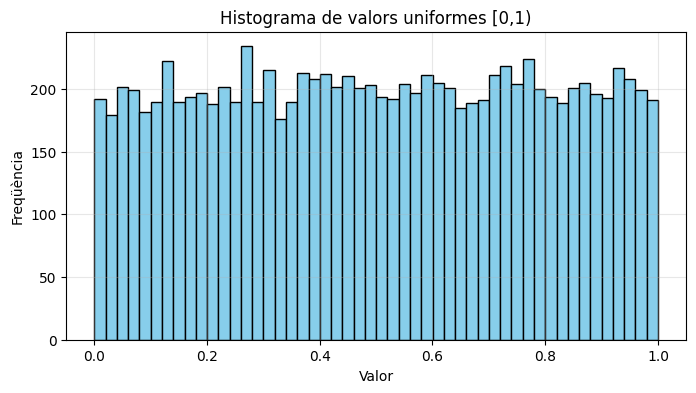

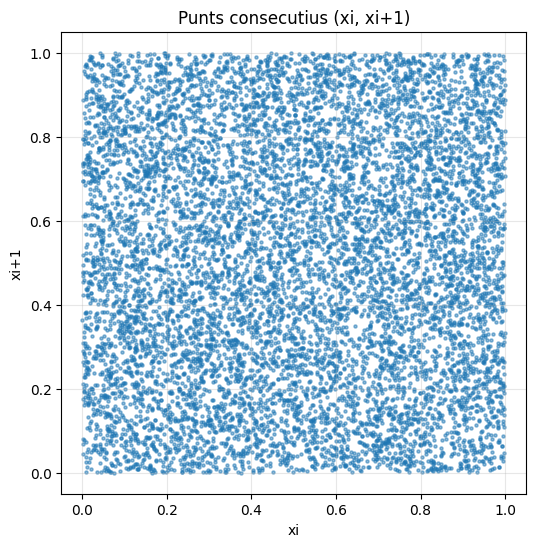

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

n = 10000
x = np.random.rand(n)

plt.figure(figsize=(8,4))
plt.hist(x, bins=50, color='skyblue', edgecolor='black')
plt.title("Histograma de valors uniformes [0,1)")
plt.xlabel("Valor")
plt.ylabel("Freqüència")
plt.grid(alpha=0.3)
plt.show()

x_pairs = np.column_stack((x[:-1], x[1:]))

plt.figure(figsize=(6,6))
plt.scatter(x_pairs[:,0], x_pairs[:,1], s=5, alpha=0.5)
plt.title("Punts consecutius (xi, xi+1)")
plt.xlabel("xi")
plt.ylabel("xi+1")
plt.grid(alpha=0.3)
plt.show()

x_triplets = np.column_stack((x[:-2], x[1:-1], x[2:]))

fig = go.Figure(data=[go.Scatter3d(
    x=x_triplets[:,0],
    y=x_triplets[:,1],
    z=x_triplets[:,2],
    mode='markers',
    marker=dict(
        size=2,
        color=x_triplets[:,0],
        colorscale='Viridis',
        opacity=0.6
    )
)])

fig.update_layout(
    title="Visualització 3D dels punts (xi, xi+1, xi+2)",
    scene=dict(
        xaxis_title='xi',
        yaxis_title='xi+1',
        zaxis_title='xi+2'
    )
)
fig.show()

# Generadors de variables aleatories (GVA)

Fer mostres de 10.000 números amb les següents distribuciones aleatories a partir d'un generador aleatori uniforme:

- Exponencial (seguint les fórmules de teoria)
- Gaussiana amb el mètode Box - Muller
- La funció triangular amb el mètode del rebuig (Von Newmann)

Grafiqueu un histograma per a cada una d'elles amb la funció original superposada al gràfic.



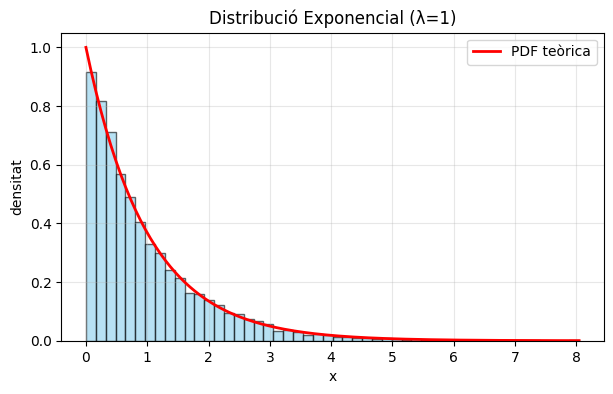

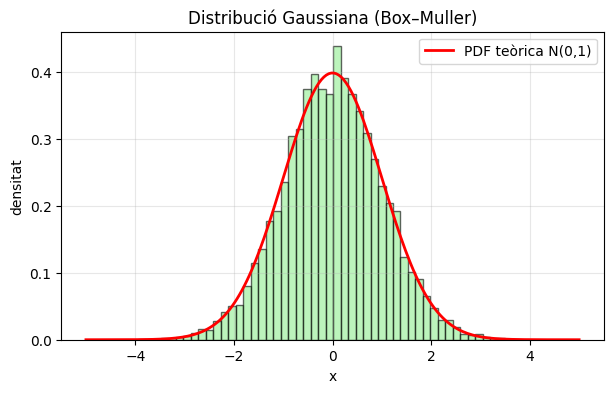

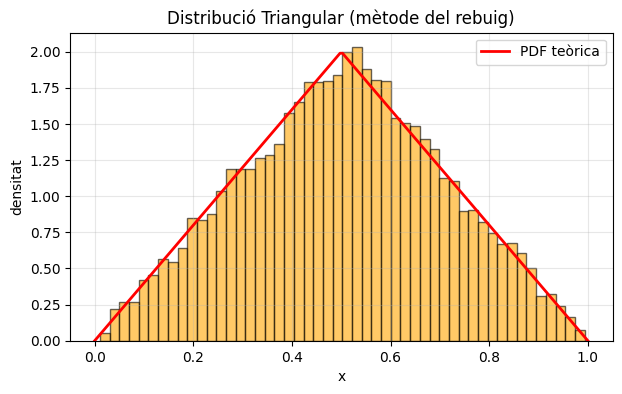

In [3]:
import numpy as np
import matplotlib.pyplot as plt

n = 10000
lambd = 1.0

u = np.random.rand(n)

x_exp = -np.log(1 - u) / lambd

x_vals = np.linspace(0, np.max(x_exp), 200)
pdf_exp = lambd * np.exp(-lambd * x_vals)

plt.figure(figsize=(7,4))
plt.hist(x_exp, bins=50, density=True, color='skyblue', edgecolor='black', alpha=0.6)
plt.plot(x_vals, pdf_exp, 'r-', lw=2, label='PDF teòrica')
plt.title("Distribució Exponencial (λ=1)")
plt.xlabel("x")
plt.ylabel("densitat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

u1 = np.random.rand(n//2)
u2 = np.random.rand(n//2)

z1 = np.sqrt(-2*np.log(u1)) * np.cos(2*np.pi*u2)
z2 = np.sqrt(-2*np.log(u1)) * np.sin(2*np.pi*u2)

x_gauss = np.concatenate([z1, z2])


x_vals = np.linspace(-5, 5, 200)
pdf_gauss = 1/np.sqrt(2*np.pi) * np.exp(-x_vals**2 / 2)

plt.figure(figsize=(7,4))
plt.hist(x_gauss, bins=50, density=True, color='lightgreen', edgecolor='black', alpha=0.6)
plt.plot(x_vals, pdf_gauss, 'r-', lw=2, label='PDF teòrica N(0,1)')
plt.title("Distribució Gaussiana (Box–Muller)")
plt.xlabel("x")
plt.ylabel("densitat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

def f_triangular(x):
    return np.where(x < 0.5, 2*x, 2*(1-x))

N = n
samples = []
while len(samples) < N:
    x = np.random.rand(N)
    y = np.random.rand(N)
    accept = y < f_triangular(x)
    samples.extend(x[accept])

x_tri = np.array(samples[:N])

x_vals = np.linspace(0, 1, 200)

# multiply by 2 so that the area under the pdf is 1
def pdf_triangular(x):
    return np.where(x < 0.5, 4*x, 4*(1-x))

pdf_tri = pdf_triangular(x_vals)

plt.figure(figsize=(7,4))
plt.hist(x_tri, bins=50, density=True, color='orange', edgecolor='black', alpha=0.6)
plt.plot(x_vals, pdf_tri, 'r-', lw=2, label='PDF teòrica')
plt.title("Distribució Triangular (mètode del rebuig)")
plt.xlabel("x")
plt.ylabel("densitat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()